<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Artificial-Intelligence-Mammography/blob/main/Classificadores_Aprendizado_Estat%C3%ADstico_C%C3%A2ncer_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

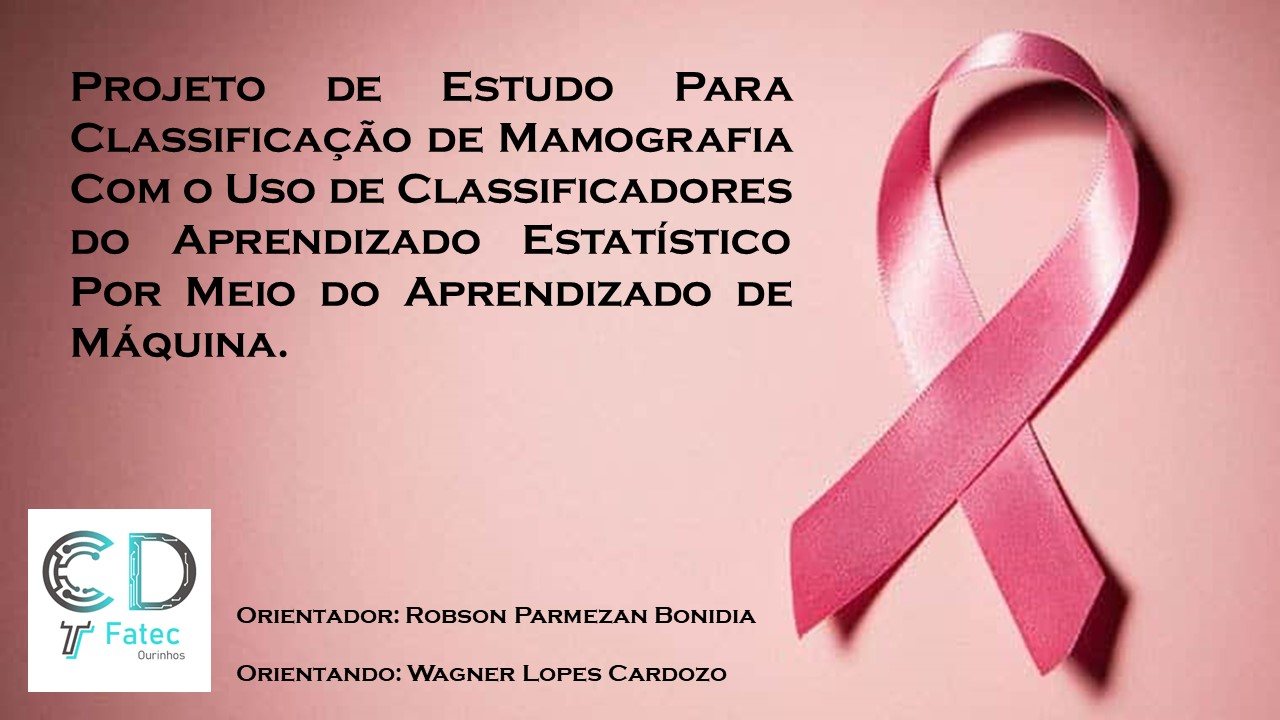

#<font color=hotpink>Classificador Árvore de Decisão

In [ ]:
#Importa as bibliotecas necessarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.tree import DecisionTreeClassifier

#Le o data frame
base = pd.read_csv('/content/breast_cancer_classification.csv')
print(base)

#Delea a coluna com Id
del(base['id'])


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

#<font color=hotpink>Classes

In [ ]:
#Divide o data frame em atributos e classe
atributos = base.iloc[:, 1:].values
classe = base.iloc[:, 0].values
#print(atributos)
print('M - MALIGNO B - BENIGNO:')
print()
print(classe)

M - MALIGNO B - BENIGNO:

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 

#<font color=hotpink>Previsões da Árvore de Decisão

In [ ]:
#Muda as variaveis da classe de nominais para variaveis numericas
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

#Aplica o escalonamento
scaler = StandardScaler()
atributos = scaler.fit_transform(atributos)

#Divide os dados para treinamento e teste
atributos_treinamento, atributos_teste, classe_treinamento, classe_teste = train_test_split(atributos, classe, test_size=0.25, random_state=0)

#Arvore de decisao
classificador= DecisionTreeClassifier(criterion='entropy', random_state=0)
classificador.fit(atributos_treinamento, classe_treinamento)
previsoes = classificador.predict(atributos_teste)
print(previsoes)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1]


#<font color=hotpink>Precisão Percentual do Classificador Árvore de Decisão e Matriz de Confusão

In [ ]:
#Mostra a precisao de acerto do algoritmo
#0.9580
precisao = accuracy_score(classe_teste, previsoes)
print('PRECISÃO DO CLASSIFICADOR:')
print()
print(precisao)
print()
#Mostra uma matriz de erros e acertos
matriz = confusion_matrix(classe_teste, previsoes)
print('MATRIZ DE CONFUSÃO:')
print()
print(matriz)

PRECISÃO DO CLASSIFICADOR:

0.958041958041958

MATRIZ DE CONFUSÃO:

[[86  4]
 [ 2 51]]


#<font color=hotpink>Conclusão: O Classificador Acertou a Classe da Patologia Carcinoma de Mama em 95,80 %

#<font color=hotpink>Este estudo será feito também para os classificadores KNN, Naive Bayes, Floresta Randômica, Rede Neural, Regressão Logística e SVM, usando o mesmo data set, objetivando comparar as incertezas percentuais (acurácias), tendo assim o melhor classificador para o câncer de mama

#<font color=hotpink>Classificador KNN

In [ ]:
#Importa as bibliotecas necessarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#Le o data frame
base = pd.read_csv('/content/breast_cancer_classification.csv')
print(base)
#Delea a coluna com Id
del(base['id'])


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

#<font color=hotpink>Classes

In [ ]:
#Divide o data frame em atributos e classe
atributos = base.iloc[:, 1:].values
classe = base.iloc[:, 0].values

#print(atributos)
print('M - MALIGNO B - BENIGNO:')
print()
print(classe)

M - MALIGNO B - BENIGNO:

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 

#<font color=hotpink>Previsões do KNN

In [ ]:
#Muda as variaveis da classe de nominais para variaveis numericas
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

#Aplica o escalonamento
scaler = StandardScaler()
atributos = scaler.fit_transform(atributos)

#Divide os dados para treinamento e teste
atributos_treinamento, atributos_teste, classe_treinamento, classe_teste = train_test_split(atributos, classe, test_size=0.15, random_state=0)

#KNN
classificador = KNeighborsClassifier (n_neighbors=5, metric='minkowski', p=2)
classificador.fit(atributos_treinamento, classe_treinamento)
previsoes = classificador.predict(atributos_teste)
print(previsoes)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0]


#<font color=hotpink>Precisão Percentual do Classificador KNN e Matriz de Confusão

In [ ]:
#Mostra a precisao de acerto do algoritmo
#0.9767
precisao = accuracy_score(classe_teste, previsoes)
print('PRECISÃO DO CLASSIFICADOR:')
print()
print(precisao)
print()
#Mostra uma matriz de erros e acertos
matriz = confusion_matrix(classe_teste, previsoes)
print('MATRIZ DE CONFUSÃO:')
print()
print(matriz)

PRECISÃO DO CLASSIFICADOR:

0.9767441860465116

MATRIZ DE CONFUSÃO:

[[50  0]
 [ 2 34]]


#<font color=hotpink>Conclusão: O Classificador Acertou a Classe da Patologia Carcinoma de Mama em 97,67 %

#<font color=hotpink>Classificador Naive Bayes

In [ ]:
#Importa as bibliotecas necessarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.naive_bayes import GaussianNB

#Le o data frame
base = pd.read_csv('/content/breast_cancer_classification.csv')

#Delea a coluna com Id
del(base['id'])

#<font color=hotpink>Classes

In [ ]:
#Divide o data frame em atributos e classe
atributos = base.iloc[:, 1:].values
classe = base.iloc[:, 0].values

#<font color=hotpink>Previsões do Naive Bayes

In [ ]:
#Muda as variaveis da classe de nominais para variaveis numericas
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

#Aplica o escalonamento
#scaler = StandardScaler()
#atributos = scaler.fit_transform(atributos)

#Divide os dados para treinamento e teste
atributos_treinamento, atributos_teste, classe_treinamento, classe_teste = train_test_split(atributos, classe, test_size=0.25, random_state=0)
#Naive Bayes
classificador = GaussianNB()
classificador.fit(atributos_treinamento, classe_treinamento)
previsoes = classificador.predict(atributos_teste)
print(previsoes)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]


#<font color=hotpink>Precisão Percentual do Classificador Naive Bayes e Matriz de Confusão

In [ ]:
#Mostra a precisao de acerto do algoritmo
#0.9370
precisao = accuracy_score(classe_teste, previsoes)
print('PRECISÃO DO CLASSIFICADOR:')
print()
print(precisao)
print()
#Mostra uma matriz de erros e acertos
matriz = confusion_matrix(classe_teste, previsoes)
print('MATRIZ DE CONFUSÃO:')
print()
print(matriz)

PRECISÃO DO CLASSIFICADOR:

0.9370629370629371

MATRIZ DE CONFUSÃO:

[[86  4]
 [ 5 48]]


#<font color=hotpink>Conclusão: O Classificador Acertou a Classe da Patologia Carcinoma de Mama em 93,70 %

#<font color=hotpink>Classificador Floresta Randomica

In [ ]:
#Importa as bibliotecas necessarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.ensemble import RandomForestClassifier

#Le o data frame
base = pd.read_csv('/content/breast_cancer_classification.csv')

#Delea a coluna com Id
del(base['id'])

#<font color=hotpink>Classes

In [ ]:
#Divide o data frame em atributos e classe
atributos = base.iloc[:, 1:].values
classe = base.iloc[:, 0].values

#<font color=hotpink>Previsões do Floresta Randomica

In [ ]:
#Divide o data frame em atributos e classe
atributos = base.iloc[:, 1:].values
classe = base.iloc[:, 0].values

#Muda as variaveis da classe de nominais para variaveis numericas
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

#Aplica o escalonamento
scaler = StandardScaler()
atributos = scaler.fit_transform(atributos)

#Divide os dados para treinamento e teste
atributos_treinamento, atributos_teste, classe_treinamento, classe_teste = train_test_split(atributos, classe, test_size=0.20, random_state=0)

#Random forest
classificador = RandomForestClassifier(n_estimators = 40, criterion='entropy', random_state=0)
classificador.fit(atributos_treinamento, classe_treinamento)
previsoes = classificador.predict(atributos_teste)

#<font color=hotpink>Precisão Percentual do Classificador Floresta Randomica e Matriz de Confusão

In [ ]:
#Mostra a precisao de acerto do algoritmo
#0.9736
precisao = accuracy_score(classe_teste, previsoes)
print('PRECISÃO DO CLASSIFICADOR:')
print()
print(precisao)
print()
#Mostra uma matriz de erros e acertos
matriz = confusion_matrix(classe_teste, previsoes)
print('MATRIZ DE CONFUSÃO:')
print()
print(matriz)

PRECISÃO DO CLASSIFICADOR:

0.9736842105263158

MATRIZ DE CONFUSÃO:

[[66  1]
 [ 2 45]]


#<font color=hotpink>Conclusão: O Classificador Acertou a Classe da Patologia Carcinoma de Mama em 97,36 %

#<font color=hotpink>Classificador Multilayer Perceptron - MLP (Rede Neural)

In [ ]:
#Importa as bibliotecas necessarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.neural_network import MLPClassifier

#Le o data frame
base = pd.read_csv('/content/breast_cancer_classification.csv')

#Delea a coluna com Id
del(base['id'])

#<font color=hotpink>Classes

In [ ]:
#Divide o data frame em atributos e classe
atributos = base.iloc[:, 1:].values
classe = base.iloc[:, 0].values

#<font color=hotpink>Previsões do Multilayer Perceptron - MLP (Rede Neural)

In [ ]:
#Muda as variaveis da classe de nominais para variaveis numericas
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

#Aplica o escalonamento
scaler = StandardScaler()
atributos = scaler.fit_transform(atributos)

#Divide os dados para treinamento e teste
atributos_treinamento, atributos_teste, classe_treinamento, classe_teste = train_test_split(atributos, classe, test_size=0.25, random_state=1)

#Rede Neural
classificador = MLPClassifier(verbose = True, max_iter=1000, tol=0.000010)
classificador.fit(atributos_treinamento, classe_treinamento)
previsoes = classificador.predict(atributos_teste)

Iteration 1, loss = 0.84006940
Iteration 2, loss = 0.68314244
Iteration 3, loss = 0.55490944
Iteration 4, loss = 0.45632536
Iteration 5, loss = 0.38364525
Iteration 6, loss = 0.32850155
Iteration 7, loss = 0.28787065
Iteration 8, loss = 0.25781643
Iteration 9, loss = 0.23318003
Iteration 10, loss = 0.21367856
Iteration 11, loss = 0.19740775
Iteration 12, loss = 0.18428553
Iteration 13, loss = 0.17303963
Iteration 14, loss = 0.16303227
Iteration 15, loss = 0.15482037
Iteration 16, loss = 0.14782695
Iteration 17, loss = 0.14190360
Iteration 18, loss = 0.13640036
Iteration 19, loss = 0.13169115
Iteration 20, loss = 0.12735370
Iteration 21, loss = 0.12346698
Iteration 22, loss = 0.11988884
Iteration 23, loss = 0.11649175
Iteration 24, loss = 0.11356709
Iteration 25, loss = 0.11074480
Iteration 26, loss = 0.10805572
Iteration 27, loss = 0.10566383
Iteration 28, loss = 0.10321567
Iteration 29, loss = 0.10093791
Iteration 30, loss = 0.09893074
Iteration 31, loss = 0.09699591
Iteration 32, los

#<font color=hotpink>Precisão Percentual do Classificador Multilayer Perceptron - MLP (Rede Neural) e Matriz de Confusão

In [ ]:
#Mostra a precisao de acerto do algoritmo
#0.9650
precisao = accuracy_score(classe_teste, previsoes)
print('PRECISÃO DO CLASSIFICADOR:')
print()
print(precisao)
print()
#Mostra uma matriz de erros e acertos
matriz = confusion_matrix(classe_teste, previsoes)
print('MATRIZ DE CONFUSÃO:')
print()
print(matriz)

PRECISÃO DO CLASSIFICADOR:

0.972027972027972

MATRIZ DE CONFUSÃO:

[[86  2]
 [ 2 53]]


#<font color=hotpink>Conclusão: O Classificador Acertou a Classe da Patologia Carcinoma de Mama em 97,20 %

#<font color=hotpink>Classificador Regressão Logística


In [ ]:
#Importa as bibliotecas necessarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.linear_model import LogisticRegression

#Le o data frame
base = pd.read_csv('/content/breast_cancer_classification.csv')

#Delea a coluna com Id
del(base['id'])

#<font color=hotpink>Classes

In [ ]:
#Divide o data frame em atributos e classe
atributos = base.iloc[:, 1:].values
classe = base.iloc[:, 0].values

#<font color=hotpink>Previsões da Regressão Logística

In [ ]:
#Muda as variaveis da classe de nominais para variaveis numericas
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

#Aplica o escalonamento
scaler = StandardScaler()
atributos = scaler.fit_transform(atributos)

#Divide os dados para treinamento e teste
atributos_treinamento, atributos_teste, classe_treinamento, classe_teste = train_test_split(atributos, classe, test_size=0.30, random_state=0)

#Regressao logistica
classificador = LogisticRegression(random_state = 1)
classificador.fit(atributos_treinamento, classe_treinamento)
previsoes = classificador.predict(atributos_teste)

#<font color=hotpink>Precisão Percentual do Classificador Regressão Logística e Matriz de Confusão

In [ ]:
#Mostra a precisao de acerto do algoritmo
#0.9824
precisao = accuracy_score(classe_teste, previsoes)
print('PRECISÃO DO CLASSIFICADOR:')
print()
print(precisao)
print()
#Mostra uma matriz de erros e acertos
matriz = confusion_matrix(classe_teste, previsoes)
print('MATRIZ DE CONFUSÃO:')
print()
print(matriz)

PRECISÃO DO CLASSIFICADOR:

0.9766081871345029

MATRIZ DE CONFUSÃO:

[[107   1]
 [  3  60]]


#<font color=hotpink>Conclusão: O Classificador Acertou a Classe da Patologia Carcinoma de Mama em 97,66 %

#<font color=hotpink>Classificador SVM


In [ ]:
#Importa as bibliotecas necessarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.svm import SVC

#Le o data frame
base = pd.read_csv('/content/breast_cancer_classification.csv')

#Delea a coluna com Id
del(base['id'])

#<font color=hotpink>Classes

In [ ]:
#Divide o data frame em atributos e classe
atributos = base.iloc[:, 1:].values
classe = base.iloc[:, 0].values

#<font color=hotpink>Previsões do SVM

In [ ]:
#Muda as variaveis da classe de nominais para variaveis numericas
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

#Aplica o escalonamento
scaler = StandardScaler()
atributos = scaler.fit_transform(atributos)

#Divide os dados para treinamento e teste
atributos_treinamento, atributos_teste, classe_treinamento, classe_teste = train_test_split(atributos, classe, test_size=0.25, random_state=1)

#SVM
classificador = SVC(kernel = 'linear', random_state=1, C=1.0)
classificador.fit(atributos_treinamento, classe_treinamento)
previsoes = classificador.predict(atributos_teste)

#<font color=hotpink>Precisão Percentual do Classificador SVM e Matriz de Confusão

In [ ]:
#Mostra a precisao de acerto do algoritmo
#0.9720
precisao = accuracy_score(classe_teste, previsoes)
print('PRECISÃO DO CLASSIFICADOR:')
print()
print(precisao)
print()
#Mostra uma matriz de erros e acertos
matriz = confusion_matrix(classe_teste, previsoes)
print('MATRIZ DE CONFUSÃO:')
print()
print(matriz)

PRECISÃO DO CLASSIFICADOR:

0.972027972027972

MATRIZ DE CONFUSÃO:

[[86  2]
 [ 2 53]]


#<font color=hotpink>Conclusão: O Classificador Acertou a Classe da Patologia Carcinoma de Mama em 97,20 %

#<font color=hotpink>Classificador Regressão Linear

In [ ]:
#Importa as bibliotecas necessarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.linear_model import LinearRegression

#Le o data frame
base = pd.read_csv('/content/breast_cancer_classification.csv')

#Delea a coluna com Id
del(base['id'])

#<font color=hotpink>Classes

In [ ]:
#Divide o data frame em atributos e classe
atributos = base.iloc[:, 1:].values
classe = base.iloc[:, 0].values

#<font color=hotpink>Previsões da Regressão Linear

In [ ]:
#Muda as variaveis da classe de nominais para variaveis numericas
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

#Aplica o escalonamento
scaler = StandardScaler()
atributos = scaler.fit_transform(atributos)

#Divide os dados para treinamento e teste
atributos_treinamento, atributos_teste, classe_treinamento, classe_teste = train_test_split(atributos, classe, test_size=0.30, random_state=0)

#Regressao logistica
classificador = LogisticRegression(random_state = 1)
classificador.fit(atributos_treinamento, classe_treinamento)
previsoes = classificador.predict(atributos_teste)

#<font color=hotpink>Precisão Percentual da Classificador Regressão Linear e Matriz de Confusão

In [ ]:
#Mostra a precisao de acerto do algoritmo
#0.9824
precisao = accuracy_score(classe_teste, previsoes)
print('PRECISÃO DO CLASSIFICADOR:')
print()
print(precisao)
print()
#Mostra uma matriz de erros e acertos
matriz = confusion_matrix(classe_teste, previsoes)
print('MATRIZ DE CONFUSÃO:')
print()
print(matriz)

PRECISÃO DO CLASSIFICADOR:

0.9766081871345029

MATRIZ DE CONFUSÃO:

[[107   1]
 [  3  60]]


#<font color=hotpink>Conclusão: O Classificador Acertou a Classe da Patologia Carcinoma de Mama em 97,66 %

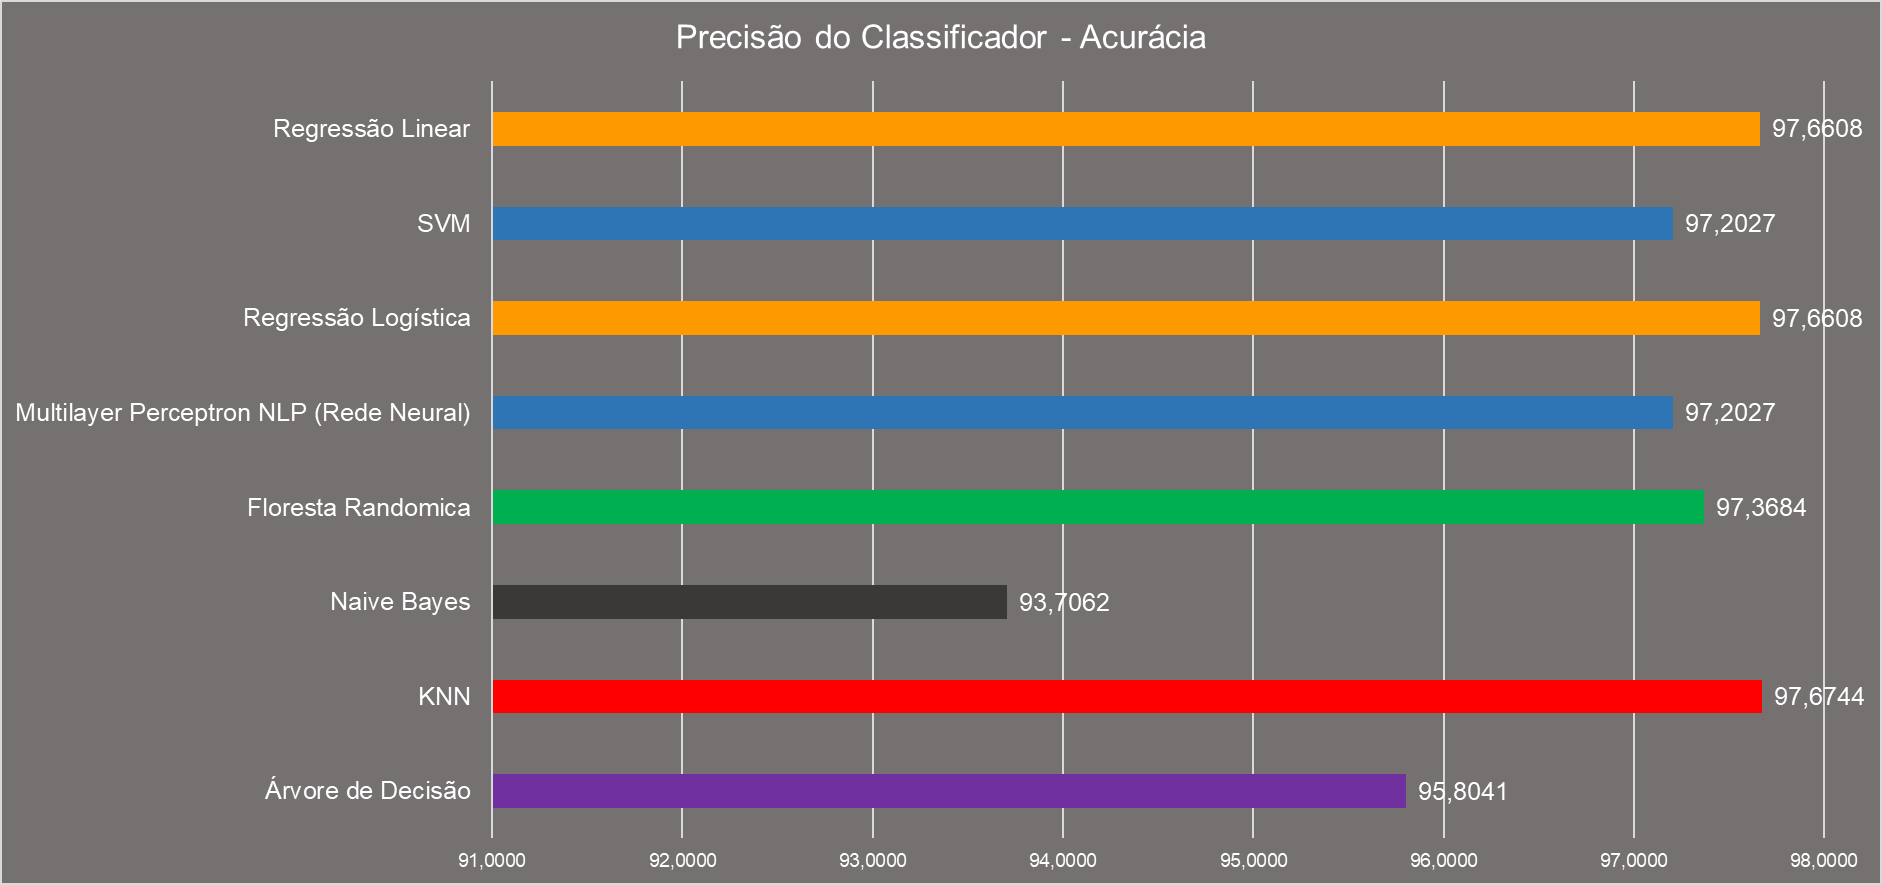

#<font color=red>Conclusão:
#<font color=hotpink>Podemos perceber com este Projeto de Estudo que, de todos os 8 classificadores do aprendizado estatístico para o aprendizado de máquina, o que teve o melhor resultado de acurácia (precisão de acerto), para classificação do carcinoma de mama benigno ou maligno foi: o classificador KNN com percentual de acerto de 97,6744 %, seguido dos classificadores Regressão Linear e Regressão Logística, ambos com 97,6608 %. Os demais classificadores SVM e Multilayer Perceptron NLP (Rede Neural), ficaram com 97,2027 de acurácia de acerto cada um, Floresta Randômica com 97,3684 %, Árvore de Decisão com 95,8041 % e Naive Bayes com 93,7062 %.

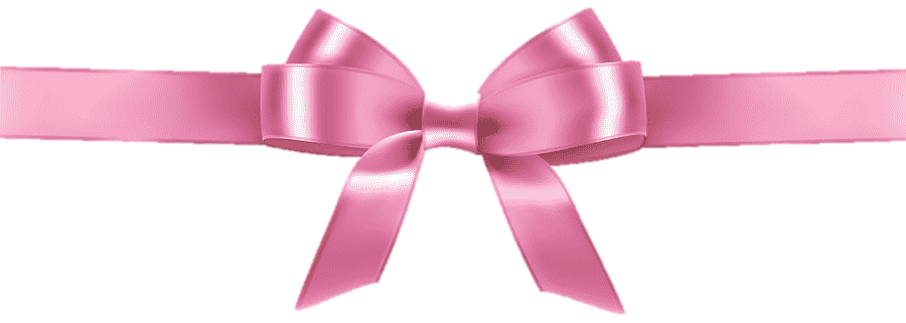